# Benchmark Results

This notebook shows the results of running the benchmark program on various systems.

## Setup

Let's import some libraries we will need:

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

And import the results:

In [2]:
rdir = Path('results')

In [3]:
results = pd.concat({
    f.stem: pd.read_table(f, sep='\t')
    for f in rdir.glob('*.tsv')
}, names=['System']).reset_index('System').reset_index(drop=True)

## Result Table

Let's compute a result table, showing MiB/s for each algorithm:

In [4]:
tbl = results.pivot(index='System', columns='hash', values='MiB/s')
tbl.style.format(precision=1).set_table_attributes('class="dataframe table table-striped"')

hash,MD5,SHA-1,SHA-256,SHA-512,SHA3-256,SHA3-512
System,,,,,,
Atom D2701,173.4,117.0,24.0,77.1,48.1,29.0
MBA M2,594.7,864.4,347.1,552.3,613.4,323.6
RPi 4,248.0,184.5,107.8,178.6,110.4,59.1
i7-1185G7 SL4,575.9,1774.3,1652.5,483.4,348.4,182.7
i9-9900,789.1,741.0,288.7,548.6,374.8,198.4


And a barchart for fun:

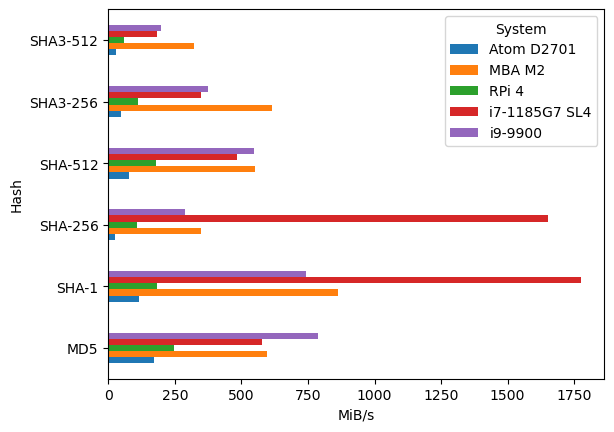

In [5]:
tbl.T.plot.barh()
plt.xlabel('MiB/s')
plt.ylabel('Hash')
plt.show()

The i7-11xx processors have Intel's SHA hash extensions which RustCrypto can use
for SHA-1 and SHA-256, which explains the substantially higher performance of
those hashes on that chip, even though it is a laptop CPU (compared to the
desktop i9 in the test processors).